In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
import collections

In [13]:
feature2def = {
    "acc_now_delinq": "The number of accounts on which the borrower is now delinquent.",
    "acc_open_past_24mths": "Number of trades opened in past 24 months.",
    "addr_state": "The state provided by the borrower in the loan application",
    "all_util": "Balance to credit limit on all trades",
    "annual_inc": "The self-reported annual income provided by the borrower during registration.",
    "annual_inc_joint": "The combined self-reported annual income provided by the co-borrowers during registration",
    "application_type": "Indicates whether the loan is an individual application or a joint application with two co-borrowers",
    "avg_cur_bal": "Average current balance of all accounts",
    "bc_open_to_buy": "Total open to buy on revolving bankcards.",
    "bc_util": "Ratio of total current balance to high credit/credit limit for all bankcard accounts.",
    "chargeoff_within_12_mths": "Number of charge-offs within 12 months",
    "collection_recovery_fee": "post charge off collection fee",
    "collections_12_mths_ex_med": "Number of collections in 12 months excluding medical collections",
    "delinq_2yrs": "The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years",
    "delinq_amnt": "The past-due amount owed for the accounts on which the borrower is now delinquent.",
    "desc": "Loan description provided by the borrower",
    "dti": "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.",
    "dti_joint": "A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income",
    "earliest_cr_line": "The month the borrower's earliest reported credit line was opened",
    "emp_length": "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. ",
    "emp_title": "The job title supplied by the Borrower when applying for the loan.*",
    "fico_range_high": "The upper boundary range the borrower’s FICO at loan origination belongs to.",
    "fico_range_low": "The lower boundary range the borrower’s FICO at loan origination belongs to.",
    "funded_amnt": "The total amount committed to that loan at that point in time.",
    "funded_amnt_inv": "The total amount committed by investors for that loan at that point in time.",
    "grade": "LC assigned loan grade",
    "home_ownership": "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER",
    "id": "A unique LC assigned ID for the loan listing.",
    "il_util": "Ratio of total current balance to high credit/credit limit on all install acct",
    "initial_list_status": "The initial listing status of the loan. Possible values are – W, F",
    "inq_fi": "Number of personal finance inquiries",
    "inq_last_12m": "Number of credit inquiries in past 12 months",
    "inq_last_6mths": "The number of inquiries in past 6 months (excluding auto and mortgage inquiries)",
    "installment": "The monthly payment owed by the borrower if the loan originates.",
    "int_rate": "Interest Rate on the loan",
    "issue_d": "The month which the loan was funded",
    "last_credit_pull_d": "The most recent month LC pulled credit for this loan",
    "last_fico_range_high": "The upper boundary range the borrower’s last FICO pulled belongs to.",
    "last_fico_range_low": "The lower boundary range the borrower’s last FICO pulled belongs to.",
    "last_pymnt_amnt": "Last total payment amount received",
    "last_pymnt_d": "Last month payment was received",
    "loan_amnt": "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.",
    "loan_status": "Current status of the loan",
    "max_bal_bc": "Maximum current balance owed on all revolving accounts",
    "member_id": "A unique LC assigned Id for the borrower member.",
    "mo_sin_old_il_acct": "Months since oldest bank installment account opened",
    "mo_sin_old_rev_tl_op": "Months since oldest revolving account opened",
    "mo_sin_rcnt_rev_tl_op": "Months since most recent revolving account opened",
    "mo_sin_rcnt_tl": "Months since most recent account opened",
    "mort_acc": "Number of mortgage accounts.",
    "mths_since_last_delinq": "The number of months since the borrower's last delinquency.",
    "mths_since_last_major_derog": "Months since most recent 90-day or worse rating",
    "mths_since_last_record": "The number of months since the last public record.",
    "mths_since_rcnt_il": "Months since most recent installment accounts opened",
    "mths_since_recent_bc": "Months since most recent bankcard account opened.",
    "mths_since_recent_bc_dlq": "Months since most recent bankcard delinquency",
    "mths_since_recent_inq": "Months since most recent inquiry.",
    "mths_since_recent_revol_delinq": "Months since most recent revolving delinquency.",
    "next_pymnt_d": "Next scheduled payment date",
    "num_accts_ever_120_pd": "Number of accounts ever 120 or more days past due",
    "num_actv_bc_tl": "Number of currently active bankcard accounts",
    "num_actv_rev_tl": "Number of currently active revolving trades",
    "num_bc_sats": "Number of satisfactory bankcard accounts",
    "num_bc_tl": "Number of bankcard accounts",
    "num_il_tl": "Number of installment accounts",
    "num_op_rev_tl": "Number of open revolving accounts",
    "num_rev_accts": "Number of revolving accounts",
    "num_rev_tl_bal_gt_0": "Number of revolving trades with balance >0",
    "num_sats": "Number of satisfactory accounts",
    "num_tl_120dpd_2m": "Number of accounts currently 120 days past due (updated in past 2 months)",
    "num_tl_30dpd": "Number of accounts currently 30 days past due (updated in past 2 months)",
    "num_tl_90g_dpd_24m": "Number of accounts 90 or more days past due in last 24 months",
    "num_tl_op_past_12m": "Number of accounts opened in past 12 months",
    "open_acc": "The number of open credit lines in the borrower's credit file.",
    "open_acc_6m": "Number of open trades in last 6 months",
    "open_il_12m": "Number of installment accounts opened in past 12 months",
    "open_il_24m": "Number of installment accounts opened in past 24 months",
    "open_act_il": "Number of currently active installment trades",
    "open_rv_12m": "Number of revolving trades opened in past 12 months",
    "open_rv_24m": "Number of revolving trades opened in past 24 months",
    "out_prncp": "Remaining outstanding principal for total amount funded",
    "out_prncp_inv": "Remaining outstanding principal for portion of total amount funded by investors",
    "pct_tl_nvr_dlq": "Percent of trades never delinquent",
    "percent_bc_gt_75": "Percentage of all bankcard accounts > 75% of limit.",
    "policy_code": "publicly available policy_code=1 new products not publicly available policy_code=2",
    "pub_rec": "Number of derogatory public records",
    "pub_rec_bankruptcies": "Number of public record bankruptcies",
    "purpose": "A category provided by the borrower for the loan request. ",
    "pymnt_plan": "Indicates if a payment plan has been put in place for the loan",
    "recoveries": "post charge off gross recovery",
    "revol_bal": "Total credit revolving balance",
    "revol_util": "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.",
    "sub_grade": "LC assigned loan subgrade",
    "tax_liens": "Number of tax liens",
    "term": "The number of payments on the loan. Values are in months and can be either 36 or 60.",
    "title": "The loan title provided by the borrower",
    "tot_coll_amt": "Total collection amounts ever owed",
    "tot_cur_bal": "Total current balance of all accounts",
    "tot_hi_cred_lim": "Total high credit/credit limit",
    "total_acc": "The total number of credit lines currently in the borrower's credit file",
    "total_bal_ex_mort": "Total credit balance excluding mortgage",
    "total_bal_il": "Total current balance of all installment accounts",
    "total_bc_limit": "Total bankcard high credit/credit limit",
    "total_cu_tl": "Number of finance trades",
    "total_il_high_credit_limit": "Total installment high credit/credit limit",
    "total_pymnt": "Payments received to date for total amount funded",
    "total_pymnt_inv": "Payments received to date for portion of total amount funded by investors",
    "total_rec_int": "Interest received to date",
    "total_rec_late_fee": "Late fees received to date",
    "total_rec_prncp": "Principal received to date",
    "total_rev_hi_lim": "Total revolving high credit/credit limit",
    "url": "URL for the LC page with listing data.",
    "verification_status": "Indicates if income was verified by LC, not verified, or if the income source was verified",
    "verified_status_joint": "Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified",
    "zip_code": "The first 3 numbers of the zip code provided by the borrower in the loan application.",
    "revol_bal_joint": "  Sum of revolving credit balance of the co-borrowers, net of duplicate balances",
    "sec_app_fico_range_low": "  FICO range (high) for the secondary applicant",
    "sec_app_fico_range_high": "  FICO range (low) for the secondary applicant",
    "sec_app_earliest_cr_line": "  Earliest credit line at time of application for the secondary applicant",
    "sec_app_inq_last_6mths": "  Credit inquiries in the last 6 months at time of application for the secondary applicant",
    "sec_app_mort_acc": "  Number of mortgage accounts at time of application for the secondary applicant",
    "sec_app_open_acc": "  Number of open trades at time of application for the secondary applicant",
    "sec_app_revol_util": "  Ratio of total current balance to high credit/credit limit for all revolving accounts",
    "sec_app_open_act_il": " Number of currently active installment trades at time of application for the secondary applicant",
    "sec_app_num_rev_accts": "  Number of revolving accounts at time of application for the secondary applicant",
    "sec_app_chargeoff_within_12_mths": "  Number of charge-offs within last 12 months at time of application for the secondary applicant",
    "sec_app_collections_12_mths_ex_med": "  Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant",
    "sec_app_mths_since_last_major_derog": "  Months since most recent 90-day or worse rating at time of application for the secondary applicant",
    "hardship_flag": "Flags whether or not the borrower is on a hardship plan",
    "hardship_type": "Describes the hardship plan offering",
    "hardship_reason": "Describes the reason the hardship plan was offered",
    "hardship_status": "Describes if the hardship plan is active, pending, canceled, completed, or broken",
    "deferral_term": "Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan",
    "hardship_amount": "The interest payment that the borrower has committed to make each month while they are on a hardship plan",
    "hardship_start_date": "The start date of the hardship plan period",
    "hardship_end_date": "The end date of the hardship plan period",
    "payment_plan_start_date": "The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments.",
    "hardship_length": "The number of months the borrower will make smaller payments than normally obligated due to a hardship plan",
    "hardship_dpd": "Account days past due as of the hardship plan start date",
    "hardship_loan_status": "Loan Status as of the hardship plan start date",
    "orig_projected_additional_accrued_interest": "The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.",
    "hardship_payoff_balance_amount": "The payoff balance amount as of the hardship plan start date",
    "hardship_last_payment_amount": "The last payment amount as of the hardship plan start date",
    "disbursement_method": "The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY",
    "debt_settlement_flag": "Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.",
    "debt_settlement_flag_date": "The most recent date that the Debt_Settlement_Flag has been set  ",
    "settlement_status": "The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT",
    "settlement_date": "The date that the borrower agrees to the settlement plan",
    "settlement_amount": "The loan amount that the borrower has agreed to settle for",
    "settlement_percentage": "The settlement amount as a percentage of the payoff balance amount on the loan",
    "settlement_term": "The number of months that the borrower will be on the settlement plan"
}


# Data exploration

## Features kept before data loading

In [14]:
ignored = [
    'Unnamed: 0',
    'id',
    'url',
    'loan_amnt', # assumption: FICO score independant of loan amount,
    'funded_amnt', # assumption: FICO score independant of loan amount,
    'funded_amnt_inv', # assumption: FICO score independant of loan amount,
    'loan_status', # no loan status if there is no loan yet
    'verification_status', # (related to lending club: was the income verified)
    'issue_d', # irrelevant (month which loan was funded)
    'emp_title', # too complicated to extract relevant information, they are almost all unique
    'title', # too complicated to extract relevant information, they are almost all unique or refer to debt consolidation
    'grade', # Assigned by LC
    'sub_grade', # Assigned by LC
    'zip_code', # MAYBE WE SHOULD KEEP THIS
    'addr_state', # MAYBE WE SHOULD KEEP THIS
]


# cols_to_remove = df.columns[(df.isna().sum() == df.shape[0])]
# cols_not_na = df.columns[~(df.isna().sum() == df.shape[0])]

cols_not_na = ['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag']



columns = list(set(cols_not_na) - set(ignored))
sorted(columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'annual_inc',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'hardship_flag',
 'home_ownership',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',


In [19]:
kept_cols_def = {k:feature2def[k] for k in columns}
dict(collections.OrderedDict(sorted(kept_cols_def.items())))

{'acc_now_delinq': 'The number of accounts on which the borrower is now delinquent.',
 'acc_open_past_24mths': 'Number of trades opened in past 24 months.',
 'annual_inc': 'The self-reported annual income provided by the borrower during registration.',
 'application_type': 'Indicates whether the loan is an individual application or a joint application with two co-borrowers',
 'avg_cur_bal': 'Average current balance of all accounts',
 'bc_open_to_buy': 'Total open to buy on revolving bankcards.',
 'bc_util': 'Ratio of total current balance to high credit/credit limit for all bankcard accounts.',
 'chargeoff_within_12_mths': 'Number of charge-offs within 12 months',
 'collection_recovery_fee': 'post charge off collection fee',
 'collections_12_mths_ex_med': 'Number of collections in 12 months excluding medical collections',
 'debt_settlement_flag': 'Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.',
 'delinq_2yrs': "The number of 30+ days

## Data loading

In [56]:
kept_cols = ['acc_now_delinq',
             'annual_inc',
             'application_type',
             'emp_length',
             'fico_range_low',
             'fico_range_high',
             'home_ownership',
             'mths_since_last_delinq',
             'purpose',
             'tot_cur_bal']

In [81]:
df = pd.read_csv('archive/Loan_status_2007-2020Q3.gzip', usecols=kept_cols)

In [82]:
display(df.head())
df.shape

,emp_length,home_ownership,annual_inc,purpose,fico_range_low,fico_range_high,mths_since_last_delinq,application_type,acc_now_delinq,tot_cur_bal
0,10+ years,RENT,24000.0,credit_card,735.0,739.0,NaN,Individual,0.0,NaN
1,< 1 year,RENT,30000.0,car,740.0,744.0,NaN,Individual,0.0,NaN
2,10+ years,RENT,12252.0,small_business,735.0,739.0,NaN,Individual,0.0,NaN
3,10+ years,RENT,49200.0,other,690.0,694.0,35.0,Individual,0.0,NaN
4,1 year,RENT,80000.0,other,695.0,699.0,38.0,Individual,0.0,NaN


(2925493, 10)

In [85]:
df.fico_range_low.min()

610.0

### Removing missing values

In [59]:
df.isna().sum()

emp_length                 205221
home_ownership                  1
annual_inc                      5
purpose                         1
fico_range_low                  1
fico_range_high                 1
mths_since_last_delinq    1536503
application_type                1
acc_now_delinq                 30
tot_cur_bal                 70277
dtype: int64

In [86]:
features_remove_na = ['home_ownership', 'annual_inc', 'emp_length', 'fico_range_low', 'fico_range_high', 
                      'application_type', 'acc_now_delinq', 'tot_cur_bal', 'purpose']
for feature in features_remove_na:
    df = df[~df[feature].isna()]
df.shape

(2652057, 10)

In [88]:
df.fico_range_low.min()

660.0

In [61]:
# replacing nan in mths_since_last_delinq by -1 because it probably means they were never delinquent
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(-1)

In [62]:
df.isna().sum()

emp_length                0
home_ownership            0
annual_inc                0
purpose                   0
fico_range_low            0
fico_range_high           0
mths_since_last_delinq    0
application_type          0
acc_now_delinq            0
tot_cur_bal               0
dtype: int64

## Formatting target

In [66]:
df['fico'] = (df.fico_range_high + df.fico_range_low)/2
df = df.drop(columns=['fico_range_high', 'fico_range_low'])

## Categorical / numerical definition

In [95]:
nominal = ['home_ownership', 'application_type', 'purpose']
ordinal = ['emp_length']
continuous = ['annual_inc', 'total_cur_bal']
discrete = ['acc_now_delinq']
target = ['fico']

categorical = nominal + ordinal
numerical = continuous + discrete
features = categorical + numerical

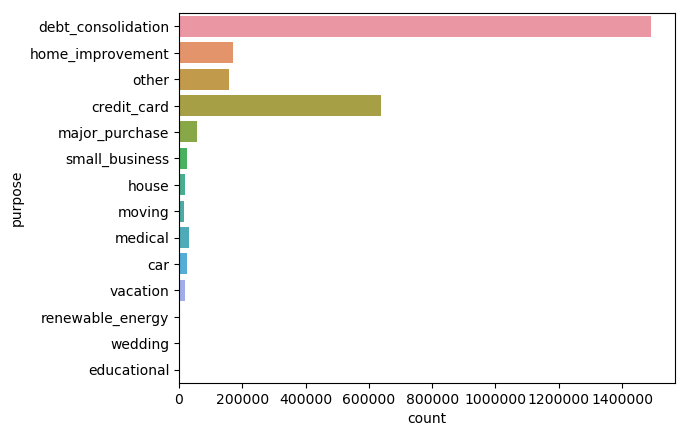

In [73]:
sns.countplot(data=df, y='purpose');

In [93]:
# putting renewable_energy, wedding and educational in other
def replace_purpose(val):
    return 'other' if val in ('renewable_energy', 'wedding', 'educational') else val

df.purpose = df.purpose.apply(replace_purpose)

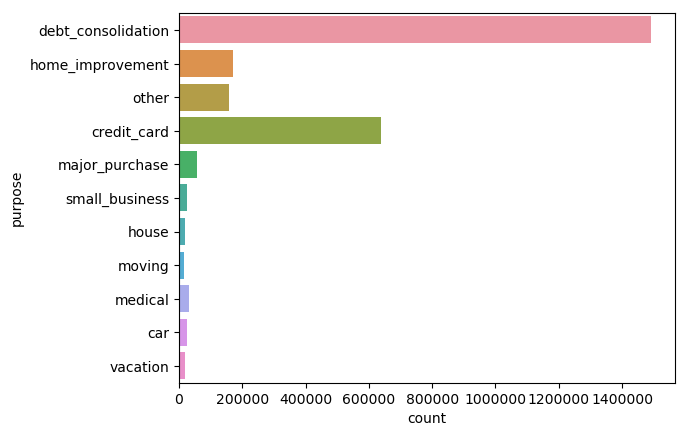

In [94]:
sns.countplot(data=df, y='purpose');

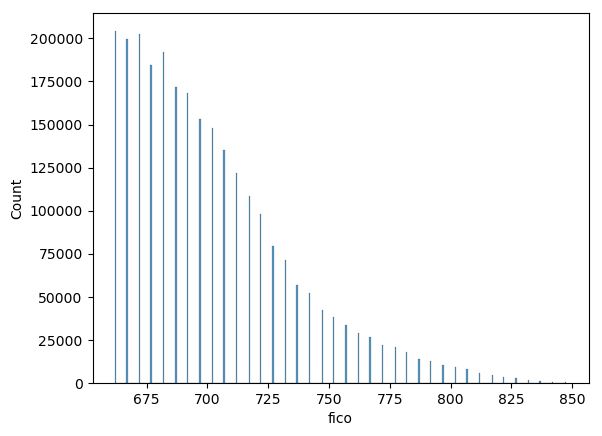

In [77]:
sns.histplot(data=df, x='fico');

## Feature Encoding

In [96]:
categorical

['home_ownership', 'application_type', 'purpose', 'emp_length']

### emp_length

In [26]:
df.emp_length.value_counts()

10+ years    29159
2 years       9501
< 1 year      9174
3 years       8703
5 years       7307
1 year        6892
4 years       6412
6 years       5673
7 years       5349
8 years       4502
9 years       3572
Name: emp_length, dtype: int64

In [71]:
emp_length_order = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

df['emp_length'] = df.emp_length.map(emp_length_order)

In [16]:
X = df.drop(columns=['fico_target'])
y = df['fico_target']

In [18]:
fs = SelectKBest(score_func=chi2, k=5)
fs.fit(df[categorical], y)

ValueError: could not convert string to float: ' 36 months'